In [81]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

### Task Description

Fraud patterns often hide in behavior rather than individual transactions. This is to generate features that capture behavioral, time-based, and geographic tendencies, then explore how they differ between legitimate and fraudulent activity.

EDA & Featuring Engineering 
1. Target Inspection 
. check is_fraud class balance to assess imbalance 

2. Univariate EDA 
 . Num: amount, fee, scores, velocities; distributions, outliers 
 . Cat: channel, currencies, kyc_tier ; counts

 3. Bivariate EDA
  . Fraud rates by channel, country, kyc_tier, time-of-day, etc

  4. Feature Engineering 
  . Time-based: hour, day-of-week, weekend
  . Amount-based: log(amount), fee_ration,high-risk flags.
  . Behavioural: velocity ratios, flags from historical behavior
  . Categorical:one-hot, ordinal, or target encoding.
  


In [82]:
df=pd.read_csv("cleaned_transactions.csv")

In [83]:
df.shape

(10780, 26)

In [84]:
df.isna().sum()

transaction_id               0
customer_id                  0
timestamp                    0
home_country                 0
source_currency              0
dest_currency                0
channel                      0
amount_src                   0
amount_usd                   0
fee                          0
exchange_rate_src_to_dest    0
device_id                    0
new_device                   0
ip_address                   0
ip_country                   0
location_mismatch            0
ip_risk_score                0
kyc_tier                     0
account_age_days             0
device_trust_score           0
chargeback_history_count     0
risk_score_internal          0
txn_velocity_1h              0
txn_velocity_24h             0
corridor_risk                0
is_fraud                     0
dtype: int64

In [85]:
#check datetime data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             10780 non-null  object 
 1   customer_id                10780 non-null  object 
 2   timestamp                  10780 non-null  object 
 3   home_country               10780 non-null  object 
 4   source_currency            10780 non-null  object 
 5   dest_currency              10780 non-null  object 
 6   channel                    10780 non-null  object 
 7   amount_src                 10780 non-null  float64
 8   amount_usd                 10780 non-null  float64
 9   fee                        10780 non-null  float64
 10  exchange_rate_src_to_dest  10780 non-null  float64
 11  device_id                  10780 non-null  object 
 12  new_device                 10780 non-null  bool   
 13  ip_address                 10780 non-null  obj

In [86]:
# correlational analysis between the numerical figures and the main target
df.corr(numeric_only=True)["is_fraud"]. sort_values(ascending=False)

is_fraud                     1.000000
txn_velocity_24h             0.759866
txn_velocity_1h              0.698681
risk_score_internal          0.612653
ip_risk_score                0.591583
chargeback_history_count     0.585117
location_mismatch            0.428793
new_device                   0.389261
corridor_risk                0.198449
exchange_rate_src_to_dest    0.154757
amount_usd                   0.131411
amount_src                   0.130744
fee                          0.130538
account_age_days            -0.291430
device_trust_score          -0.440364
Name: is_fraud, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

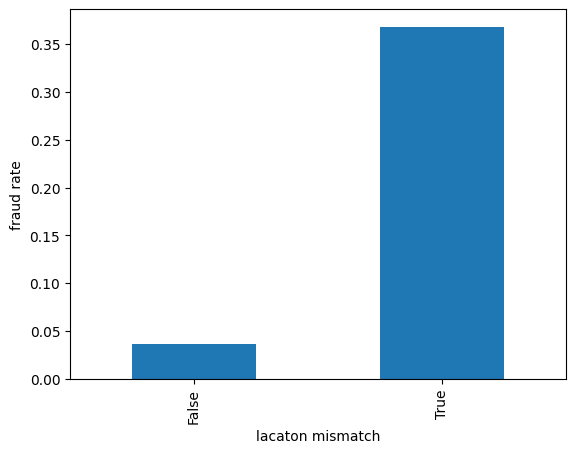

In [87]:
# checking for Fraud rate bylocation_mismatch 
df.groupby ("location_mismatch")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("lacaton mismatch")
plt.show

In [88]:
#List the categorical columns 
cat_cols = df.select_dtypes(include = ["object", "category"]).columns
cat_cols

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'device_id',
       'ip_address', 'ip_country', 'kyc_tier'],
      dtype='object')

Text(0.5, 0, 'channel')

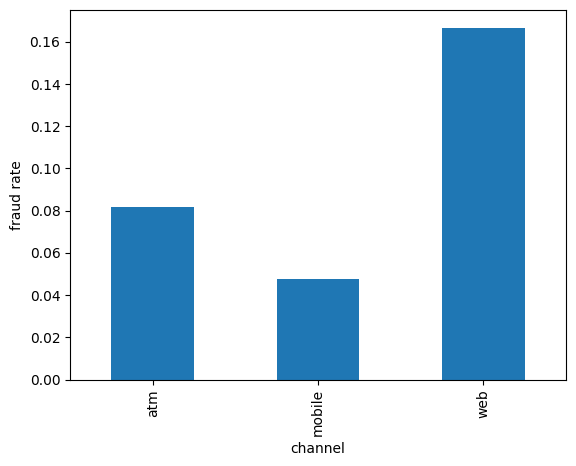

In [89]:
#checking fraud rate by channel feature 

df.groupby("channel")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("channel")

Text(0.5, 0, 'kyc_tier')

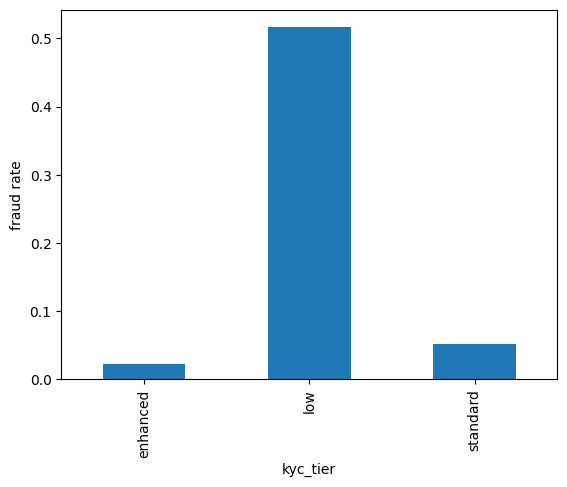

In [90]:
df.groupby("kyc_tier")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("kyc_tier")

Text(0.5, 0, 'home_country')

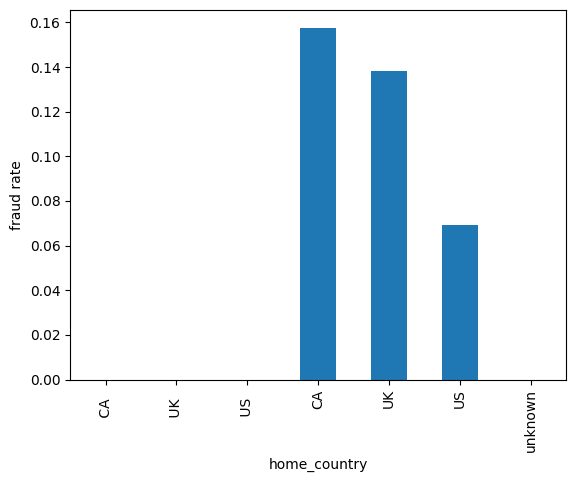

In [91]:
df.groupby("home_country")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("home_country")

The Chat above shows repectation and the needs to be unique

In [92]:
df["home_country"].unique()

array(['US', 'CA', 'UK', ' UK  ', ' US  ', 'unknown', ' CA  '],
      dtype=object)

In [93]:
#striping the home_country 
df["home_country"] = df["home_country"].str.strip()

In [94]:
df["timestamp"].unique()

array(['2022-10-03 18:40:59.468549+00:00',
       '2022-10-03 20:39:38.468549+00:00',
       '2022-10-03 23:02:43.468549+00:00', ...,
       '2025-11-27 06:19:11.573611+00:00',
       '2025-11-28 00:53:28.573611+00:00',
       '2025-11-29 20:10:47.573611+00:00'], shape=(10590,), dtype=object)

Feature Engineering 
  Extracts the hour, day_of_week, and weekend indicator from the timestamp column.

   hour shows the time of the day (0-23)

   day_of_week shows which day it is (0=Mon...6=Sun)

   is_weekend becomes 1 for Saturday/Sunday, else 0

   The prints show the new columns and distribution of hours


In [95]:
#Extract time-based features
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"]. dt.dayofweek
df["is_weekend"] = (df["day_of_week"] >=5).astype(int)

print("Time feature created:@")
print(df[["timestamp", "hour", "day_of_week", "is_weekend"]].head())
print("\nHour distribution:")
print(df["hour"].value_counts().sort_index())

Time feature created:@
                         timestamp  hour  day_of_week  is_weekend
0 2022-10-03 18:40:59.468549+00:00    18            0           0
1 2022-10-03 20:39:38.468549+00:00    20            0           0
2 2022-10-03 23:02:43.468549+00:00    23            0           0
3 2022-10-04 01:08:53.468549+00:00     1            1           0
4 2022-10-04 09:35:03.468549+00:00     9            1           0

Hour distribution:
hour
0     452
1     398
2     413
3     480
4     503
5     471
6     464
7     439
8     471
9     425
10    444
11    424
12    447
13    444
14    413
15    467
16    461
17    422
18    467
19    491
20    434
21    423
22    450
23    477
Name: count, dtype: int64


hour
0     0.064159
1     0.065327
2     0.079903
3     0.122917
4     0.186879
5     0.163482
6     0.213362
7     0.186788
8     0.129512
9     0.047059
10    0.072072
11    0.077830
12    0.062640
13    0.067568
14    0.079903
15    0.059957
16    0.065076
17    0.049763
18    0.077088
19    0.046843
20    0.059908
21    0.080378
22    0.057778
23    0.044025
Name: is_fraud, dtype: float64


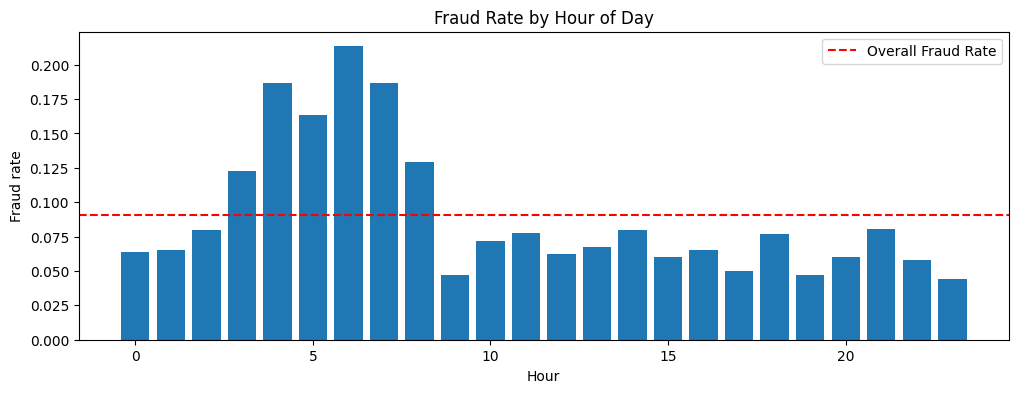

In [98]:
# Fraud rate by Hour
fraud_by_hour = df.groupby("hour")["is_fraud"].mean()

print(fraud_by_hour)

plt.figure(figsize=(12,4))
plt.bar(fraud_by_hour.index, fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel("Fraud rate")
plt.title("Fraud Rate by Hour of Day")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.show()


Create account age buckets(e.g <30d, 30-90d, etc) using pd.cut based on account_age_days.

compute the fraud rate for each age bucket by taking the mean of is_fraud

plot a bar chat shoing the fraud rate per age cateory

Draws a red dashed line showin the overall fraud rate so you can compare each bucket against the global average

In [99]:
#create a bucket for account age days
#describing the account age days
df["account_age_days"].describe()


count    10780.00000
mean       393.49898
std        342.17545
min          1.00000
25%        147.00000
50%        285.00000
75%        661.00000
max       1095.00000
Name: account_age_days, dtype: float64

In [106]:
#Fraud rate by account age buckets
df["age_bucket"] = pd.cut(df["account_age_days"], 
                          bins=[0, 30, 90, 180, 365, np.inf],
                            labels=["<30d","30-90d","90-180d","180-365d",">1yr"])
fraud_by_age_bucket = df.groupby("age_bucket")["is_fraud"].mean()
print(fraud_by_age_bucket)

age_bucket
<30d        0.368681
30-90d      0.442584
90-180d     0.023736
180-365d    0.016901
>1yr        0.010534
Name: is_fraud, dtype: float64


C:\Users\khali\AppData\Local\Temp\ipykernel_24700\4274484982.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age_bucket = df.groupby("age_bucket")["is_fraud"].mean()


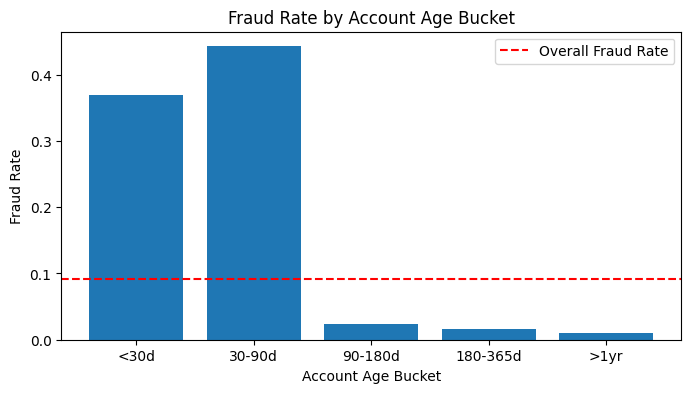

In [107]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(fraud_by_age_bucket)), fraud_by_age_bucket.values)
plt.xticks(range(len(fraud_by_age_bucket)), fraud_by_age_bucket.index)
plt.xlabel('Account Age Bucket')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Account Age Bucket')
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()   
plt.show()

In [109]:
# Fraud rate by velocity (transactions in last hour)
fraud_by_velocity = df.groupby("txn_velocity_1h")["is_fraud"].mean()
print(fraud_by_velocity)


txn_velocity_1h
0    0.017459
1    0.000000
2    0.000000
3    0.835878
4    0.842324
5    0.801047
6    0.700000
7    0.702703
8    0.482759
Name: is_fraud, dtype: float64


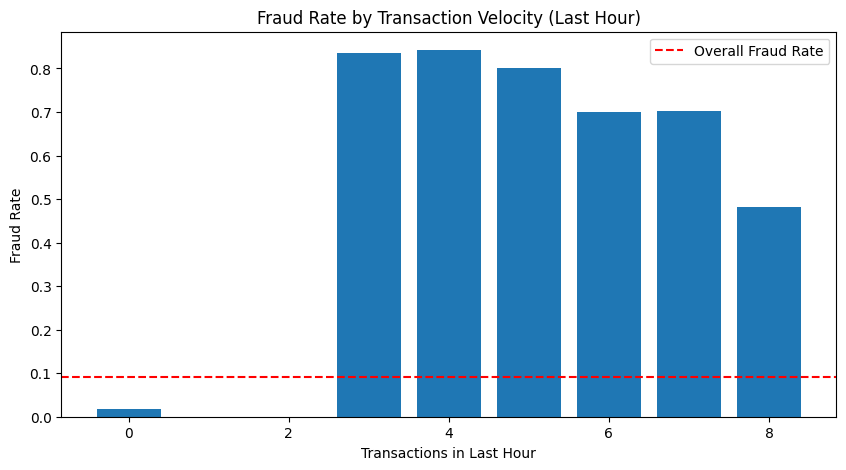

In [110]:
#plt graph for fraud rate by velocity
plt.figure(figsize=(10, 5))
plt.bar(fraud_by_velocity.index, fraud_by_velocity.values)
plt.xlabel("Transactions in Last Hour")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Velocity (Last Hour)")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()    
plt.show()

In [116]:
# Fraud rate by amount buckets
df["amount_bucket"] = pd.cut(df["amount_usd"],
                            bins=[0, 100, 500, 1000, 2000, 5000, 20000, np.inf],
                            labels=["<$50","$50-100","$100-500","$500-1k","$1k-2k","$2k-5k",">$5k"])

fraud_by_amount = df.groupby("amount_bucket")["is_fraud"].mean()
print(fraud_by_amount)

amount_bucket
<$50        0.017952
$50-100     0.061642
$100-500    0.301768
$500-1k     0.676806
$1k-2k      0.943820
$2k-5k      0.140909
>$5k             NaN
Name: is_fraud, dtype: float64


C:\Users\khali\AppData\Local\Temp\ipykernel_24700\4251015114.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = df.groupby("amount_bucket")["is_fraud"].mean()


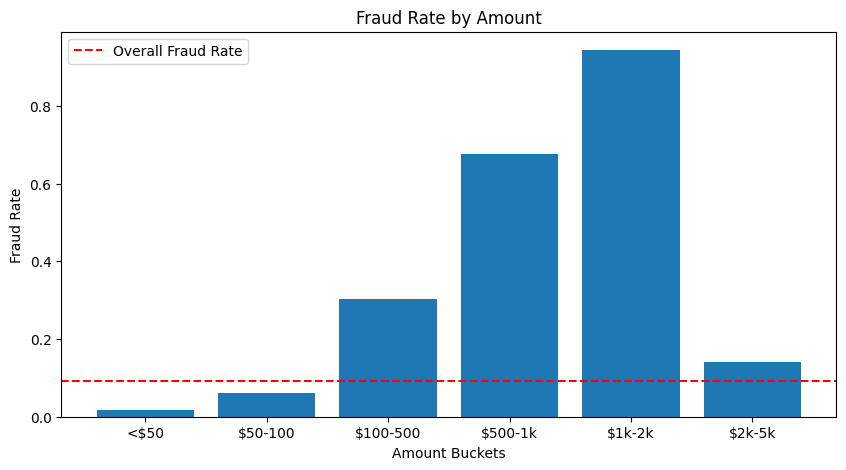

In [118]:
#Plot fraud rate by amount buckets
plt.figure(figsize=(10, 5))
plt.bar(fraud_by_amount.index, fraud_by_amount.values)
plt.xlabel("Amount Buckets")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Amount")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.show()